### 603966 法兰泰克
##### 加权平均净资产收益率

| 2019 | 2018 | 2017 |
| ---- | ---- | ---- |
| 10.70% | 7.75% | 8.24% |

##### 2020-11-02
* 最初模版

In [12]:
ticker = '603966'

In [13]:
%%html
<style>
table {float:left}
</style>

In [14]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [16]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,0.49,0.49,"1,105,857,750 ( 44.8%)","976,850,527 ( 42.8%)","102,639,716 ( 55.7%)"
2018-12-31,0.32,0.31,"763,731,766 ( 20.0%)","684,064,229 ( 20.2%)","65,926,686 ( 3.3%)"
2017-12-31,0.31,0.31,"636,607,711 ( 17.6%)","568,872,373 ( 18.4%)","63,819,192 ( 12.1%)"
2016-12-31,0.47,0.47,"541,237,075 ( -2.0%)","480,372,624 ( -2.6%)","56,938,705 ( 5.7%)"
2015-12-31,0.45,0.45,"552,363,377 ( 14.6%)","493,295,482 ( 18.9%)","53,857,145 ( -9.5%)"
2014-12-31,0.50,0.50,"482,115,545 ( 2.0%)","414,902,224 ( 2.3%)","59,505,170 ( -2.6%)"
2013-12-31,0.51,0.51,"472,560,396 ( nan%)","405,663,248 ( nan%)","61,067,813 ( nan%)"


In [17]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"356,634,669 ( 4.7%)","50,863,498 ( 48.6%)"
2020-06-30,"324,333,700 ( 27.3%)","60,558,300 ( 52.3%)"
2020-03-31,"202,632,643 ( 6.7%)","6,236,415 ( 76.0%)"
2019-12-31,"320,364,637 ( 28.6%)","25,114,956 ( 36.5%)"
2019-09-30,"340,770,478 ( 79.9%)","34,223,383 ( 64.4%)"
2019-06-30,"254,762,748 ( 23.1%)","39,757,946 ( 60.9%)"
2019-03-31,"189,959,886 ( 60.6%)","3,543,431 ( 77.1%)"
2018-12-31,"249,121,735 ( 16.2%)","18,396,699 ( -9.9%)"
2018-09-30,"189,409,265 ( 21.3%)","20,815,783 (-14.7%)"


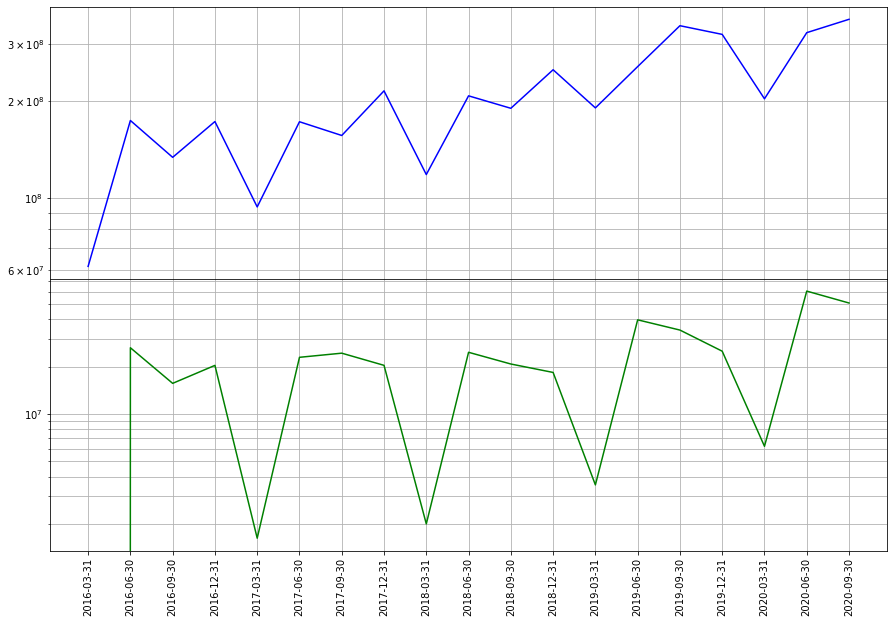

In [18]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [19]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,27.9,9.8
2018-12-31,25.6,8.6
2017-12-31,25.0,10.0
2016-12-31,25.1,10.5
2015-12-31,24.9,9.8
2014-12-31,30.0,12.3
2013-12-31,28.5,12.9


In [20]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"1,105,857,750 ( 44.8%)","507,359,182 ( 34.8%)","198,157,855 ( 23.8%)","288,327,280 ( -7.2%)"
2018-12-31,"763,731,766 ( 20.0%)","376,514,051 ( 78.5%)","160,078,305 ( 15.0%)","310,821,258 ( 22.4%)"
2017-12-31,"636,607,711 ( 17.6%)","210,947,652 ( 20.2%)","139,152,489 ( 19.5%)","253,861,346 ( 25.1%)"
2016-12-31,"541,237,075 ( -2.0%)","175,487,522 (-12.0%)","116,412,789 ( 32.7%)","202,956,871 ( 36.3%)"
2015-12-31,"552,363,377 ( 14.6%)","199,477,049 (-13.4%)","87,707,217 ( 23.0%)","148,938,679 ( 22.5%)"
2014-12-31,"482,115,545 ( 2.0%)","230,314,975 ( 39.8%)","71,325,552 (-23.7%)","121,591,088 (-19.1%)"
2013-12-31,"472,560,396 ( nan%)","164,800,084 ( nan%)","93,495,233 ( nan%)","150,271,556 ( nan%)"


In [21]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权        滚动市盈率        前复权增长
      first   last   min    max      
交易日期                                 
2017   7.88  12.30  26.2  106.4  56.1
2018  12.69   8.48  23.4   42.4 -33.2
2019   8.41  10.21  21.4   45.2  21.4
2020  10.33  14.82  18.2   33.6  43.5

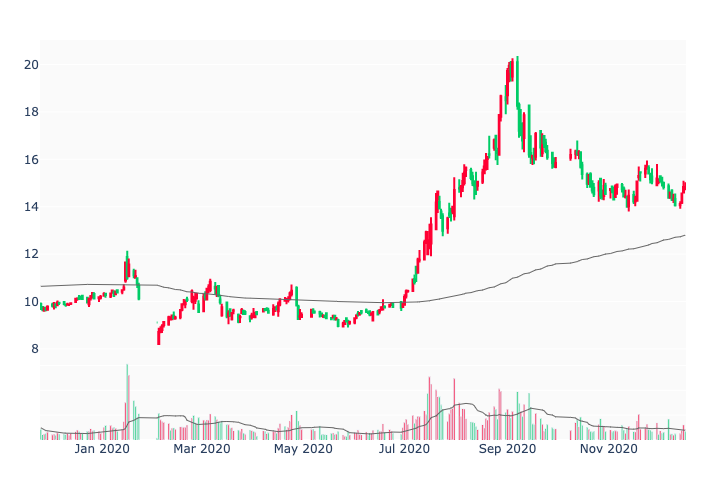

In [22]:
draw(mkt, 260, 200, 20)